<a href="https://colab.research.google.com/github/somewhereovertherainbo/audio_processing/blob/main/audio_expt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pylab as plt

import librosa
import librosa.display
import IPython.display as ipd

# With Original Audio

In [4]:
ipd.Audio('/content/00_Original.wav')

In [5]:
y, sr = librosa.load('/content/00_Original.wav')

In [6]:
print(f'Length of y is : {len(y)}')
print(f'Sampling rate is : {sr}')
print(f'Audio signal samples: {y[:5]}')
print(f'Play time of audio is : num of samples/num of smaples per second : len(y)/sr : {len(y)/sr} sec')

Length of y is : 1343110
Sampling rate is : 22050
Audio signal samples: [-0.00025759 -0.0002945  -0.00026843 -0.00031326 -0.00034365]
Play time of audio is : num of samples/num of smaples per second : len(y)/sr : 60.912018140589566 sec


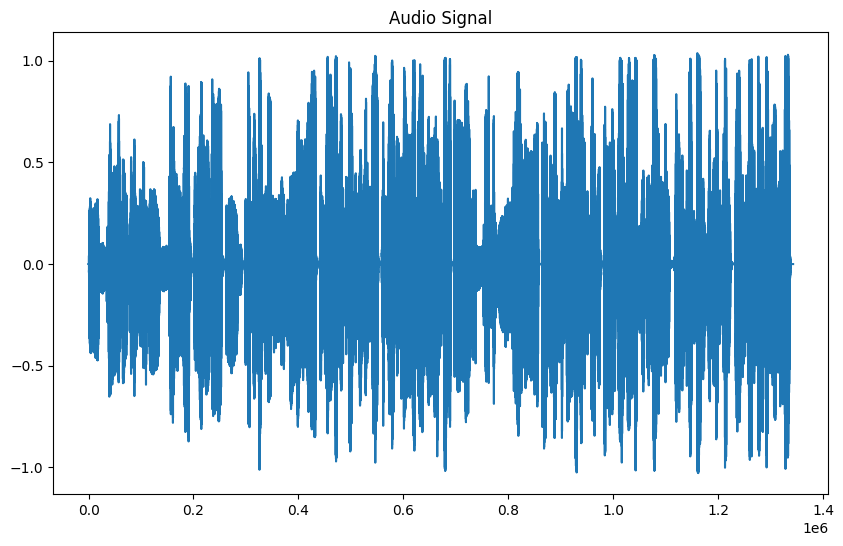

In [7]:
#Visualizing audio signal
plt.figure(figsize=(10,6))
plt.plot(y)
plt.title('Audio Signal')
plt.show()

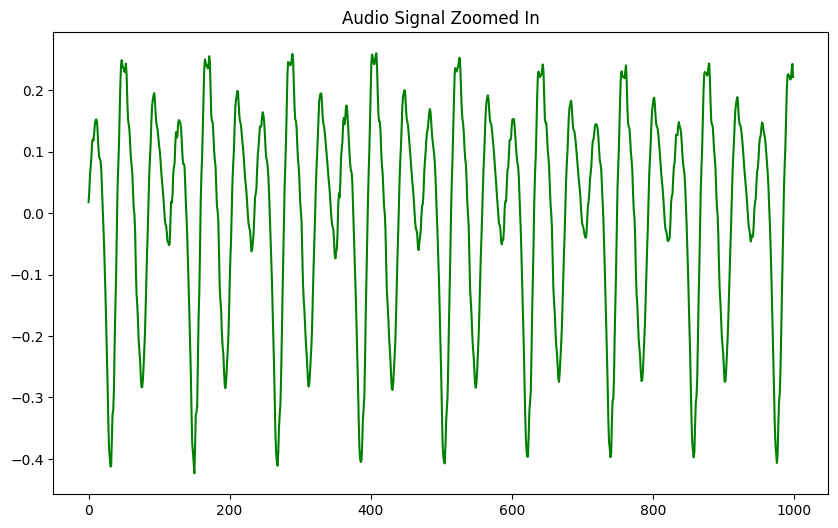

In [8]:
#Visualizing audio signal
plt.figure(figsize=(10,6))
plt.plot(y[10000:11000], color = 'green')
plt.title('Audio Signal Zoomed In')
plt.show()

In [9]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref = np.max)
S_db.shape

(1025, 2624)

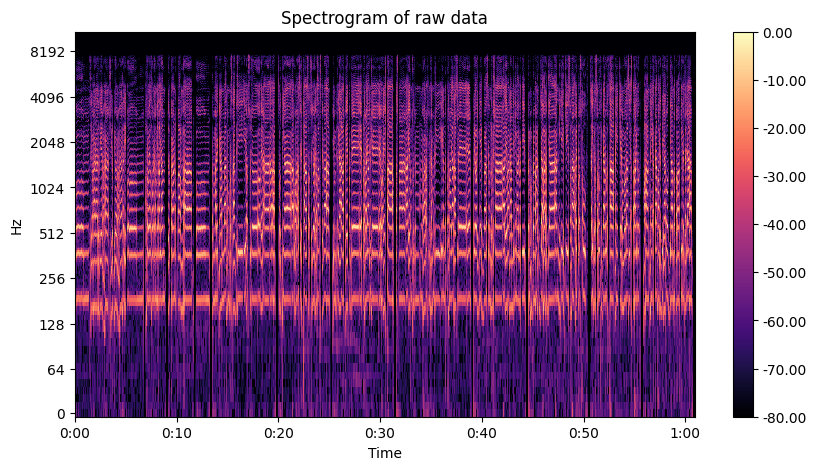

In [10]:
fig,ax =plt.subplots(figsize = (10,5))
img = librosa.display.specshow(S_db,
                               x_axis = 'time',
                               y_axis = 'log',
                               ax= ax)
ax.set_title('Spectrogram of raw data')
fig.colorbar(img, ax=ax, format = f'%0.2f')
plt.show()

In [11]:
S = librosa.feature.melspectrogram(y=y,
                                  sr=sr,
                                  n_mels = 256)
S_db_mel = librosa.amplitude_to_db(S, ref = np.max)
S_db_mel.shape

(256, 2624)

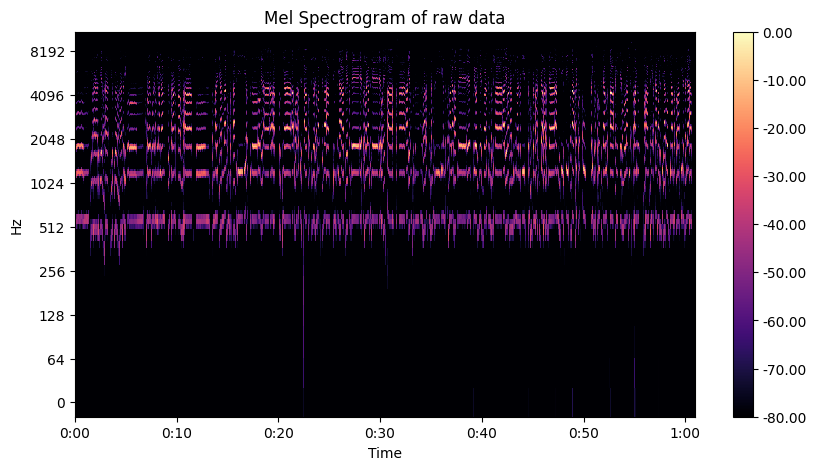

In [12]:
fig,ax =plt.subplots(figsize = (10,5))
img = librosa.display.specshow(S_db_mel,
                               x_axis = 'time',
                               y_axis = 'log',
                               ax= ax)
ax.set_title('Mel Spectrogram of raw data')
fig.colorbar(img, ax=ax, format = f'%0.2f')
plt.show()

# With Resampled Audio

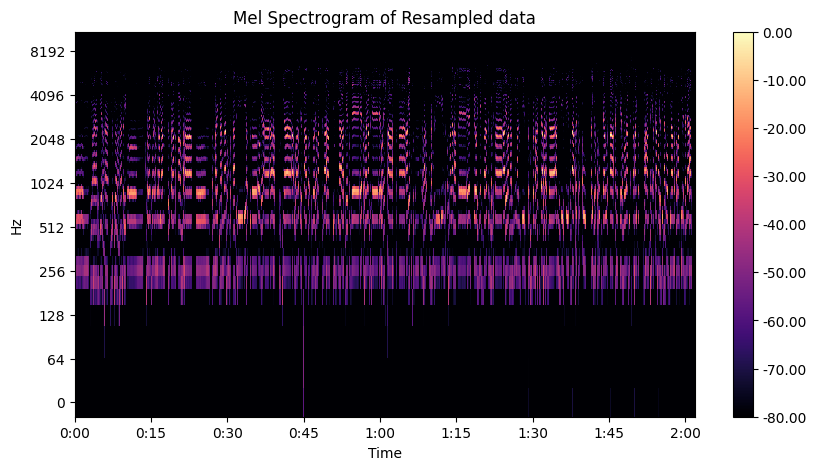

In [13]:
y_rs, sr_rs = librosa.load('/content/00_SR_change_2.wav')

S_rs = librosa.feature.melspectrogram(y=y_rs,
                                  sr=sr_rs,
                                  n_mels = 256)
S_rs_db_mel = librosa.amplitude_to_db(S_rs, ref = np.max)
S_rs_db_mel.shape

fig,ax =plt.subplots(figsize = (10,5))
img = librosa.display.specshow(S_rs_db_mel,
                               x_axis = 'time',
                               y_axis = 'log',
                               ax= ax)
ax.set_title('Mel Spectrogram of Resampled data')
fig.colorbar(img, ax=ax, format = f'%0.2f')
plt.show()

# With WSOLA audio

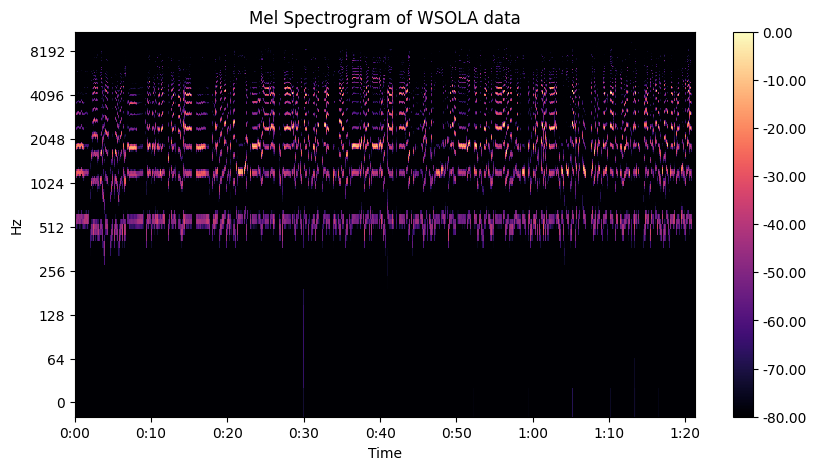

In [14]:
y_wsola, sr_wsola = librosa.load('/content/00_wsola_change.wav')

S_wsola = librosa.feature.melspectrogram(y=y_wsola,
                                  sr=sr_wsola,
                                  n_mels =  256)
S_wsola_db_mel = librosa.amplitude_to_db(S_wsola, ref = np.max)
S_wsola_db_mel.shape

fig,ax =plt.subplots(figsize = (10,5))
img = librosa.display.specshow(S_wsola_db_mel,
                               x_axis = 'time',
                               y_axis = 'log',
                               ax= ax)
ax.set_title('Mel Spectrogram of WSOLA data')
fig.colorbar(img, ax=ax, format = f'%0.2f')
plt.show()

In [15]:
S_rs_db_mel.shape, S_wsola_db_mel.shape, S_db_mel.shape

((256, 5247), (256, 3498), (256, 2624))

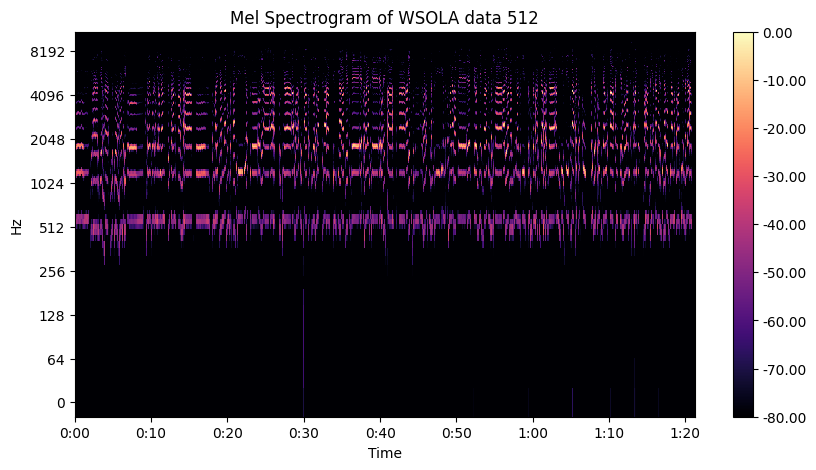

In [18]:
y_wsola_512, sr_wsola_512 = librosa.load('/content/00_wsola_change_512.wav')

S_wsola_512 = librosa.feature.melspectrogram(y=y_wsola_512,
                                  sr=sr_wsola_512,
                                  n_mels =  256)
S_wsola_db_mel_512 = librosa.amplitude_to_db(S_wsola_512, ref = np.max)
S_wsola_db_mel_512.shape

fig,ax =plt.subplots(figsize = (10,5))
img = librosa.display.specshow(S_wsola_db_mel_512,
                               x_axis = 'time',
                               y_axis = 'log',
                               ax= ax)
ax.set_title('Mel Spectrogram of WSOLA data 512')
fig.colorbar(img, ax=ax, format = f'%0.2f')
plt.show()

In [19]:
ss_rs = np.sum(S_rs_db_mel, axis = 1)
ss_wsola = np.sum(S_wsola_db_mel, axis = 1)
ss_raw = np.sum(S_db_mel, axis = 1)
ss_wsola_512 = np.sum(S_wsola_db_mel_512, axis = 1)

In [23]:
np.average(ss_rs - ss_raw), np.average(ss_raw/S_db_mel.shape[1] - ss_wsola/S_wsola_db_mel.shape[1]), np.average(ss_raw/S_db_mel.shape[1] - ss_wsola_512/S_wsola_db_mel_512.shape[1])

(-205100.55, 0.8130441, 0.5136361)